# EDA: Knockout Analysis

In [16]:
import numpy as np
import torch
import pandas as pd
from os.path import join as oj

from kipoi_veff.utils.plot import seqlogo_heatmap
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
def swap_positions(pwms):
    # swap from agct to acgt format
    return pwms[:, np.array([0, 2, 1, 3]), :]

### Look at knockout errors

In [5]:
# out directory
out_dir = "../out"

# load in knockout errs
l1_errs = np.load(oj(out_dir, "knockout_errs_l1.npy"))
l2_errs = np.load(oj(out_dir, "knockout_errs_l2.npy"))
l1_errs.shape, l2_errs.shape

((320, 919), (320, 919))

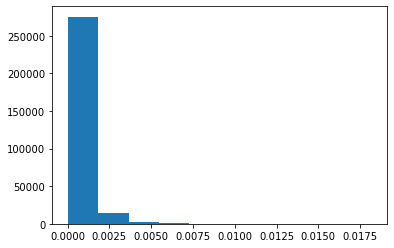

In [7]:
plt.hist(l1_errs.flatten())
plt.show()

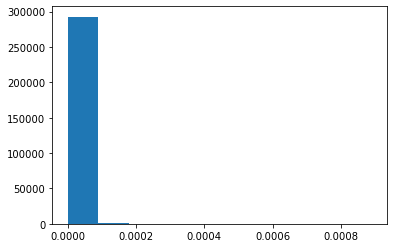

In [8]:
plt.hist(l2_errs.flatten())
plt.show()

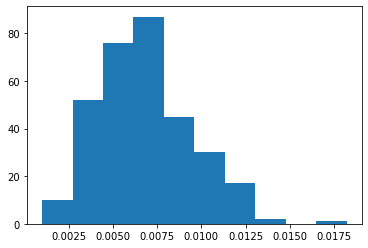

In [9]:
plt.hist(l1_errs.max(axis = 1))
plt.show()

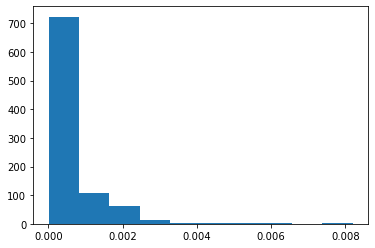

In [12]:
plt.hist(l1_errs[0, :])
plt.show()

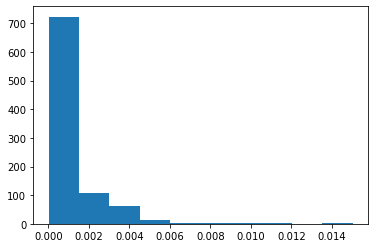

In [13]:
plt.hist(l1_errs[0, :] / l1_errs[0, :].sum())
plt.show()

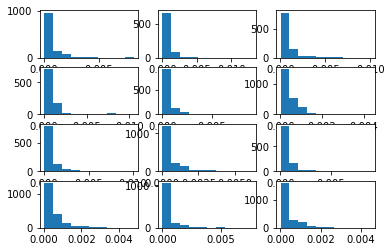

In [14]:
# visualizing distribution of first 12 filters
fig, axs = plt.subplots(4, 3)
for i in range(4):
    for j in range(3):
        axs[i, j].hist(l1_errs[i*4 + j, :], density = 1)

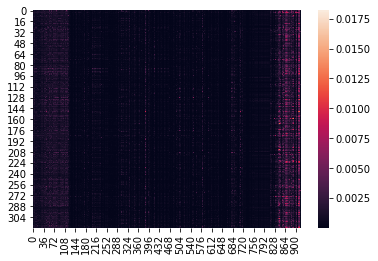

In [20]:
sb.heatmap(l1_errs)
plt.show()

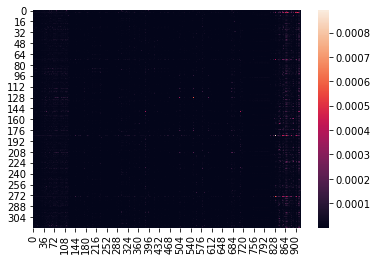

In [21]:
sb.heatmap(l2_errs)
plt.show()

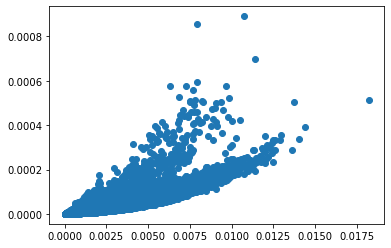

In [22]:
plt.scatter(l1_errs.flatten(), l2_errs.flatten())
plt.show()

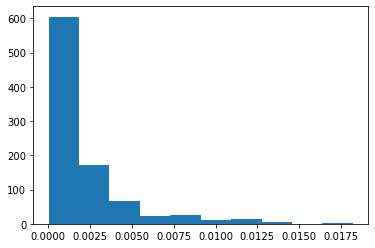

In [23]:
plt.hist(l1_errs.max(axis = 0))
plt.show()

In [33]:
ypred_np = np.load("../out/ypred_test.npy")

In [34]:
ypred_np.shape

(455024, 919)

In [35]:
torch.save(torch.Tensor(ypred_np), "../out/ypred_test.pt")

In [44]:
Yhat = torch.load("../out/ypred_test.pt").detach().numpy()
Yhat_vars = np.zeros(Yhat.shape[1])
l1_errs_scaled = np.zeros_like(l1_errs)
l2_errs_scaled = np.zeros_like(l2_errs)
for i in range(Yhat.shape[1]):
    Yhat_vars[i] = np.var(Yhat[:, i])
    l1_errs_scaled[:, i] = l1_errs[:, i] / Yhat_vars[i]
    l2_errs_scaled[:, i] = l2_errs[:, i] / Yhat_vars[i]

In [45]:
l1_errs_scaled.shape, l2_errs_scaled.shape

((320, 919), (320, 919))

In [46]:
np.savetxt("../out/knockout_errs_l1_scaled.csv", l1_errs_scaled, delimiter=",")
np.savetxt("../out/knockout_errs_l2_scaled.csv", l2_errs_scaled, delimiter=",")

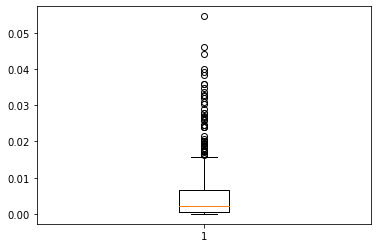

In [47]:
plt.boxplot(Yhat_vars)
plt.show()

In [41]:
Yhat_vars.min()

4.117285712368357e-08

In [43]:
np.where(Yhat_vars == Yhat_vars.min())

(array([500]),)

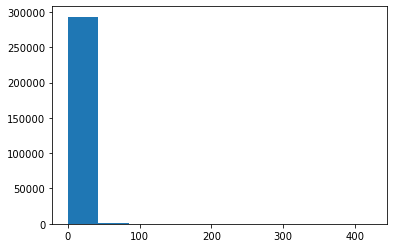

In [50]:
plt.hist(l1_errs_scaled.flatten())
plt.show()

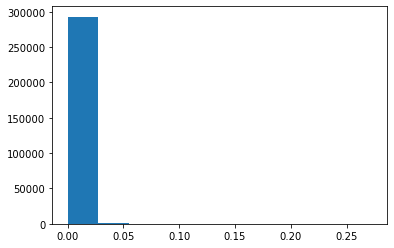

In [51]:
plt.hist(l2_errs_scaled.flatten())
plt.show()

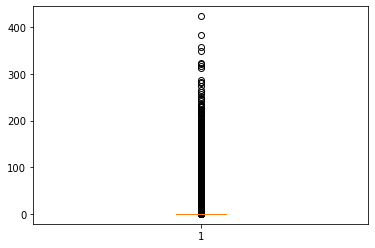

In [53]:
plt.boxplot(l1_errs_scaled.flatten())
plt.show()

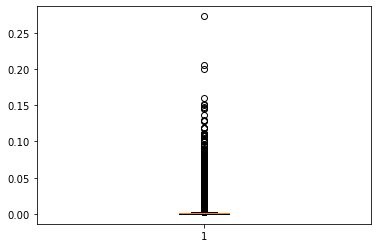

In [52]:
plt.boxplot(l2_errs_scaled.flatten())
plt.show()

In [54]:
l2_errs_scaled.shape

(320, 919)